In [1]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [2]:
print(x_train.shape)
print(y_test.shape)
#60000 traing data and 10000 testing data with 28(Row)*28(Columns) pixels

(60000, 28, 28)
(10000,)


C:\Users\user\AppData\Local\Temp/ipykernel_1740/3596941604.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


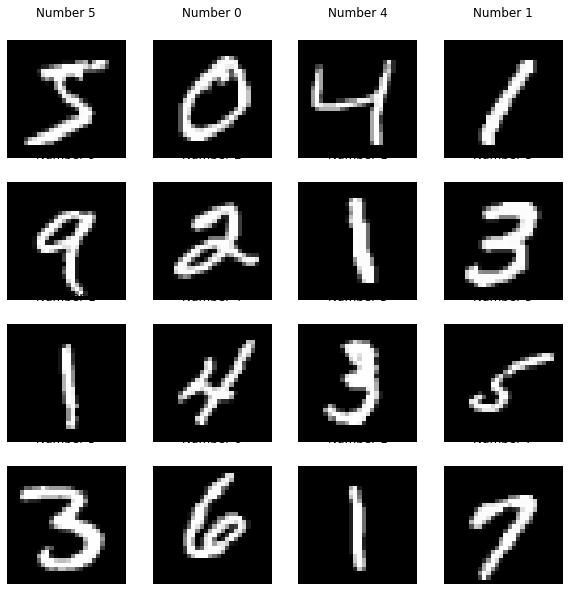

In [6]:
#import matplotlib
import matplotlib.pyplot as plt
#matplotlib.use('module://ipykernel.pylab.backend_inline')
#%matplotlib inline
fig, axs = plt.subplots(4,4, figsize =(10,10))
plt.gray()
for i, ax in enumerate(axs.flat):
  ax.matshow(x_train[i])
  ax.axis('off')
  ax.set_title('Number {}'.format(y_train[i]))
fig.show()

In [7]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [8]:
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32') 
x_train /= 255 
x_test /= 255 
print('x_train shape:', x_train.shape) 
print('Number of images in x_train', x_train.shape[0]) 
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [9]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D 
model = Sequential() 
model. add (Conv2D(28, kernel_size=(3, 3), input_shape=input_shape)) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Flatten()) 
model.add (Dense(128, activation=tf.nn.relu)) 
model.add(Dropout (0.2)) 
model.add(Dense(10,activation=tf.nn.softmax))

In [10]:
model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x=x_train, y=y_train, epochs=2)

Epoch 1/2
1875/1875 [==============================] - 52s 25ms/step - loss: 0.1961 - accuracy: 0.9412
Epoch 2/2
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0783 - accuracy: 0.9761


In [11]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.0523 - accuracy: 0.9833


[0.05229034274816513, 0.983299970626831]